loading data 

In [12]:
import pandas as pd

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer


df = pd.read_csv('cleaned_data.csv')
text_column = 'what_is_your_career_goal?'

# Drop NaN values
df_text = df[text_column].dropna().reset_index(drop=True)


cluster similar data

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_text)

# KMeans clustering (choose k based on Elbow method ideally)
k = 5
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)

df_text_clustered = pd.DataFrame({
    'Text': df_text,
    'Cluster': model.labels_
})

print(df_text_clustered.head(10))


                                                Text  Cluster
0  My Career Goal Is To Become A Skilled Data Sci...        0
1                       Become A Ml Or Data Engineer        2
2                                       Data Analyst        0
3                        Ai Scientist & Enterpreneur        0
4                                To Get A Decent Job        3
5  I Want To Get Into Data Science Or Analytics I...        4
6                                          Professor        3
7  Becoming A Software Engineer And Do Research I...        2
8                                      Data Analysis        0
9                                        Ml Engineer        2


extractive summaries

In [14]:
import nltk
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jhasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def summarize_text(text, num_sentences=3):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LsaSummarizer()
    summary = summarizer(parser.document, num_sentences)
    return " ".join(str(sentence) for sentence in summary)

keyword frequency

In [18]:
import numpy as np

# Top words per cluster
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

for i in range(k):
    print(f"\ Cluster {i} keywords:")
    top_keywords = [terms[ind] for ind in order_centroids[i, :10]]
    print(", ".join(top_keywords))


\ Cluster 0 keywords:
data, scientist, analyst, scientists, scientistdba, analysis, enterpreneur, building, researcher, industry
\ Cluster 1 keywords:
ai, engineer, skilled, world, efficiency, expert, entrepreneur, enterpreneur, ensuring, enjoy
\ Cluster 2 keywords:
engineer, ml, ai, software, expert, research, data, efficiency, entrepreneur, enterpreneur
\ Cluster 3 keywords:
developer, job, software, game, development, professor, high, want, aap, web
\ Cluster 4 keywords:
learning, goal, career, real, machine, world, problems, data, field, science


word cloud

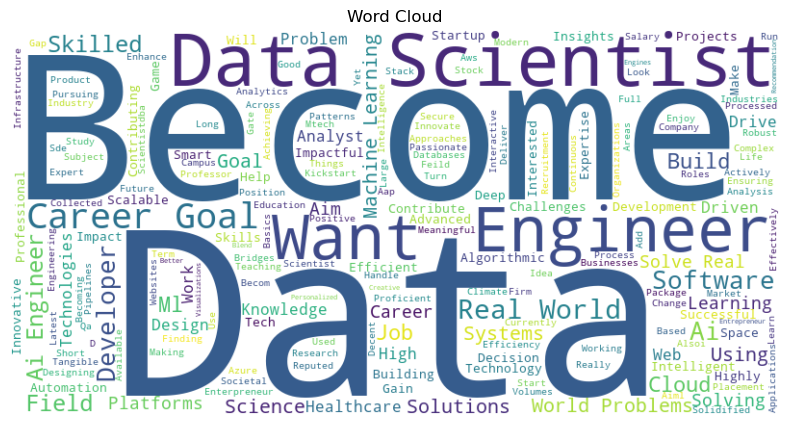

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# All text combined
combined_text = ' '.join(df_text)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()
